In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In C:\xampp1\anaconda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\xampp1\anaconda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\xampp1\anaconda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\xampp1\anaconda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\xampp1\anaconda\envs\tensorflow\lib\site-packa

In [2]:
datasets = pd.read_excel('covid.xls')

In [3]:
datasets.fillna(datasets.mean(), inplace=True)

In [4]:
datasets.columns

Index(['id', 'age', 'sex', 'diabetes', 'hypertension', 'cvd', 'copd', 'cancer',
       'renal', 'ace', 'arbs', 'acearbs', 'covidseverity', 'verysevere',
       'ageclass', 'ageclass1', 'ageclass2', 'ageclass3', 'ageclass4',
       'ageclass5', 'ageclass6', 'ageclass7', 'severe', 'death'],
      dtype='object')

In [5]:
X = datasets.iloc[:,0:22]
Y = datasets.iloc[:, -1].values

In [6]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)

In [7]:

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [15]:

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['covidseverity','verysevere']

In [16]:
featureScores

,covidseverity,verysevere
0,id,104.643960
1,age,1324.450899
2,sex,1.898531
3,diabetes,35.230432
4,hypertension,68.500776
5,cvd,72.179225
6,copd,33.034061
7,cancer,19.246096
8,renal,29.084130
9,ace,20.014005


In [19]:
print(featureScores.nlargest(10,'verysevere'))

    covidseverity   verysevere
14       ageclass  2233.047416
1             age  1324.450899
13     verysevere  1102.059732
12  covidseverity   711.167191
21      ageclass7   120.777395
0              id   104.643960
5             cvd    72.179225
4    hypertension    68.500776
11        acearbs    49.021875
3        diabetes    35.230432


In [10]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [11]:
print(model.feature_importances_)

[5.02597246e-02 5.75580437e-02 1.60672758e-02 1.35526217e-02
 1.39611931e-02 1.82549791e-02 9.01766696e-03 6.82757986e-03
 6.22516132e-03 5.89017428e-03 6.61709663e-03 6.63746221e-03
 2.52626114e-01 4.62499067e-01 2.07774609e-02 1.24145740e-05
 3.19189200e-03 1.83732279e-03 4.33873674e-03 5.01909218e-03
 8.70168822e-03 3.01272328e-02]


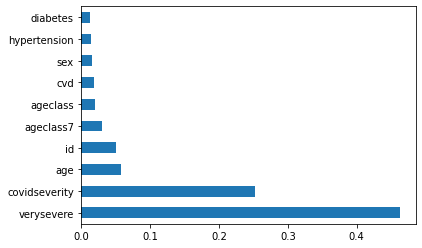

In [12]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

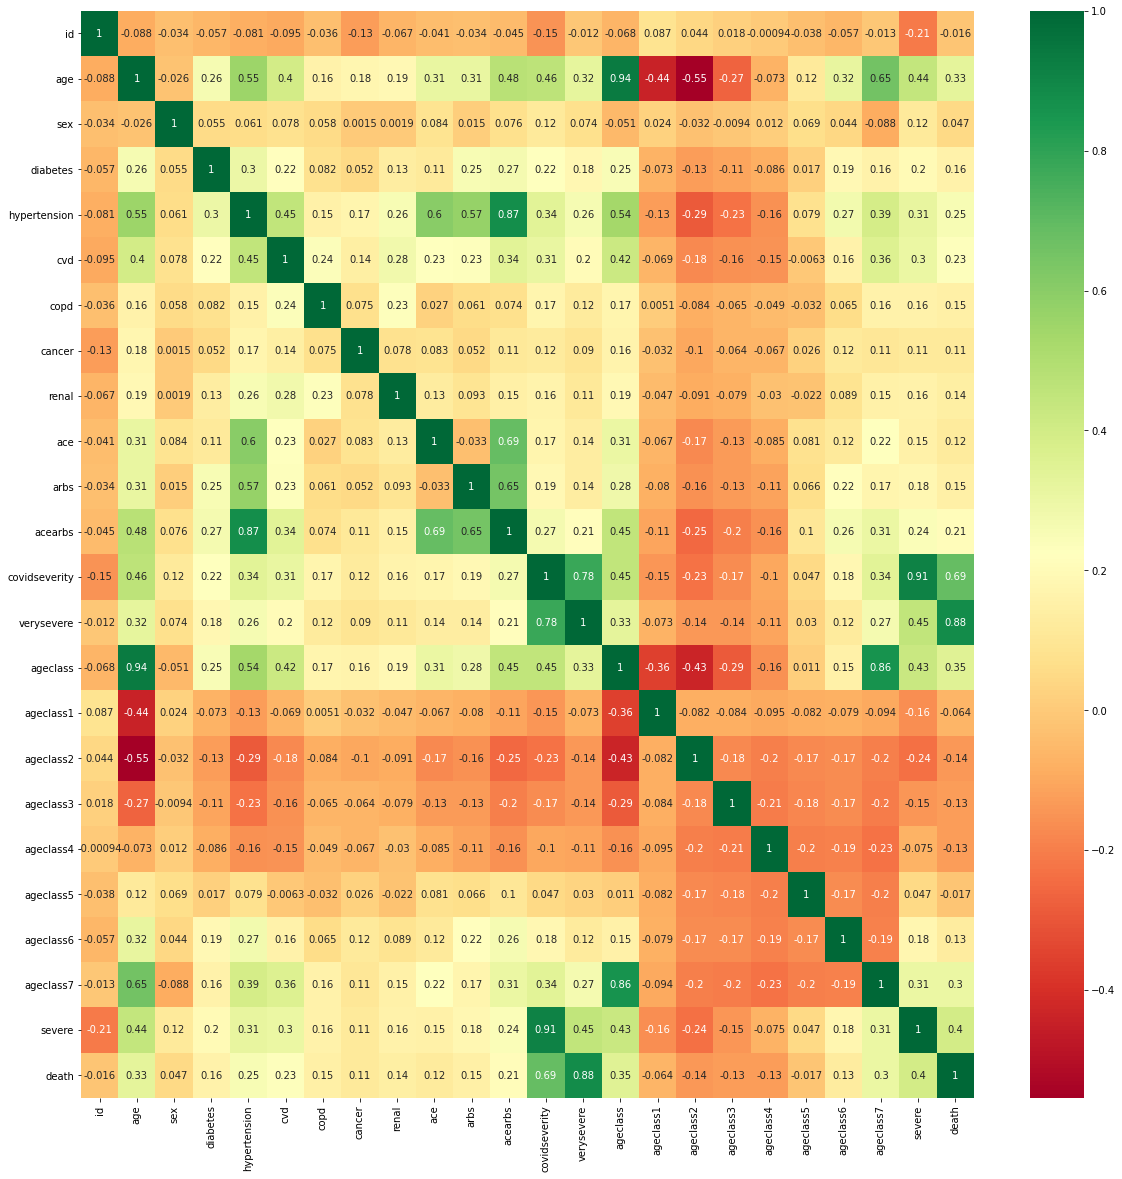

In [14]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = datasets.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(datasets[top_corr_features].corr(),annot=True,cmap="RdYlGn")

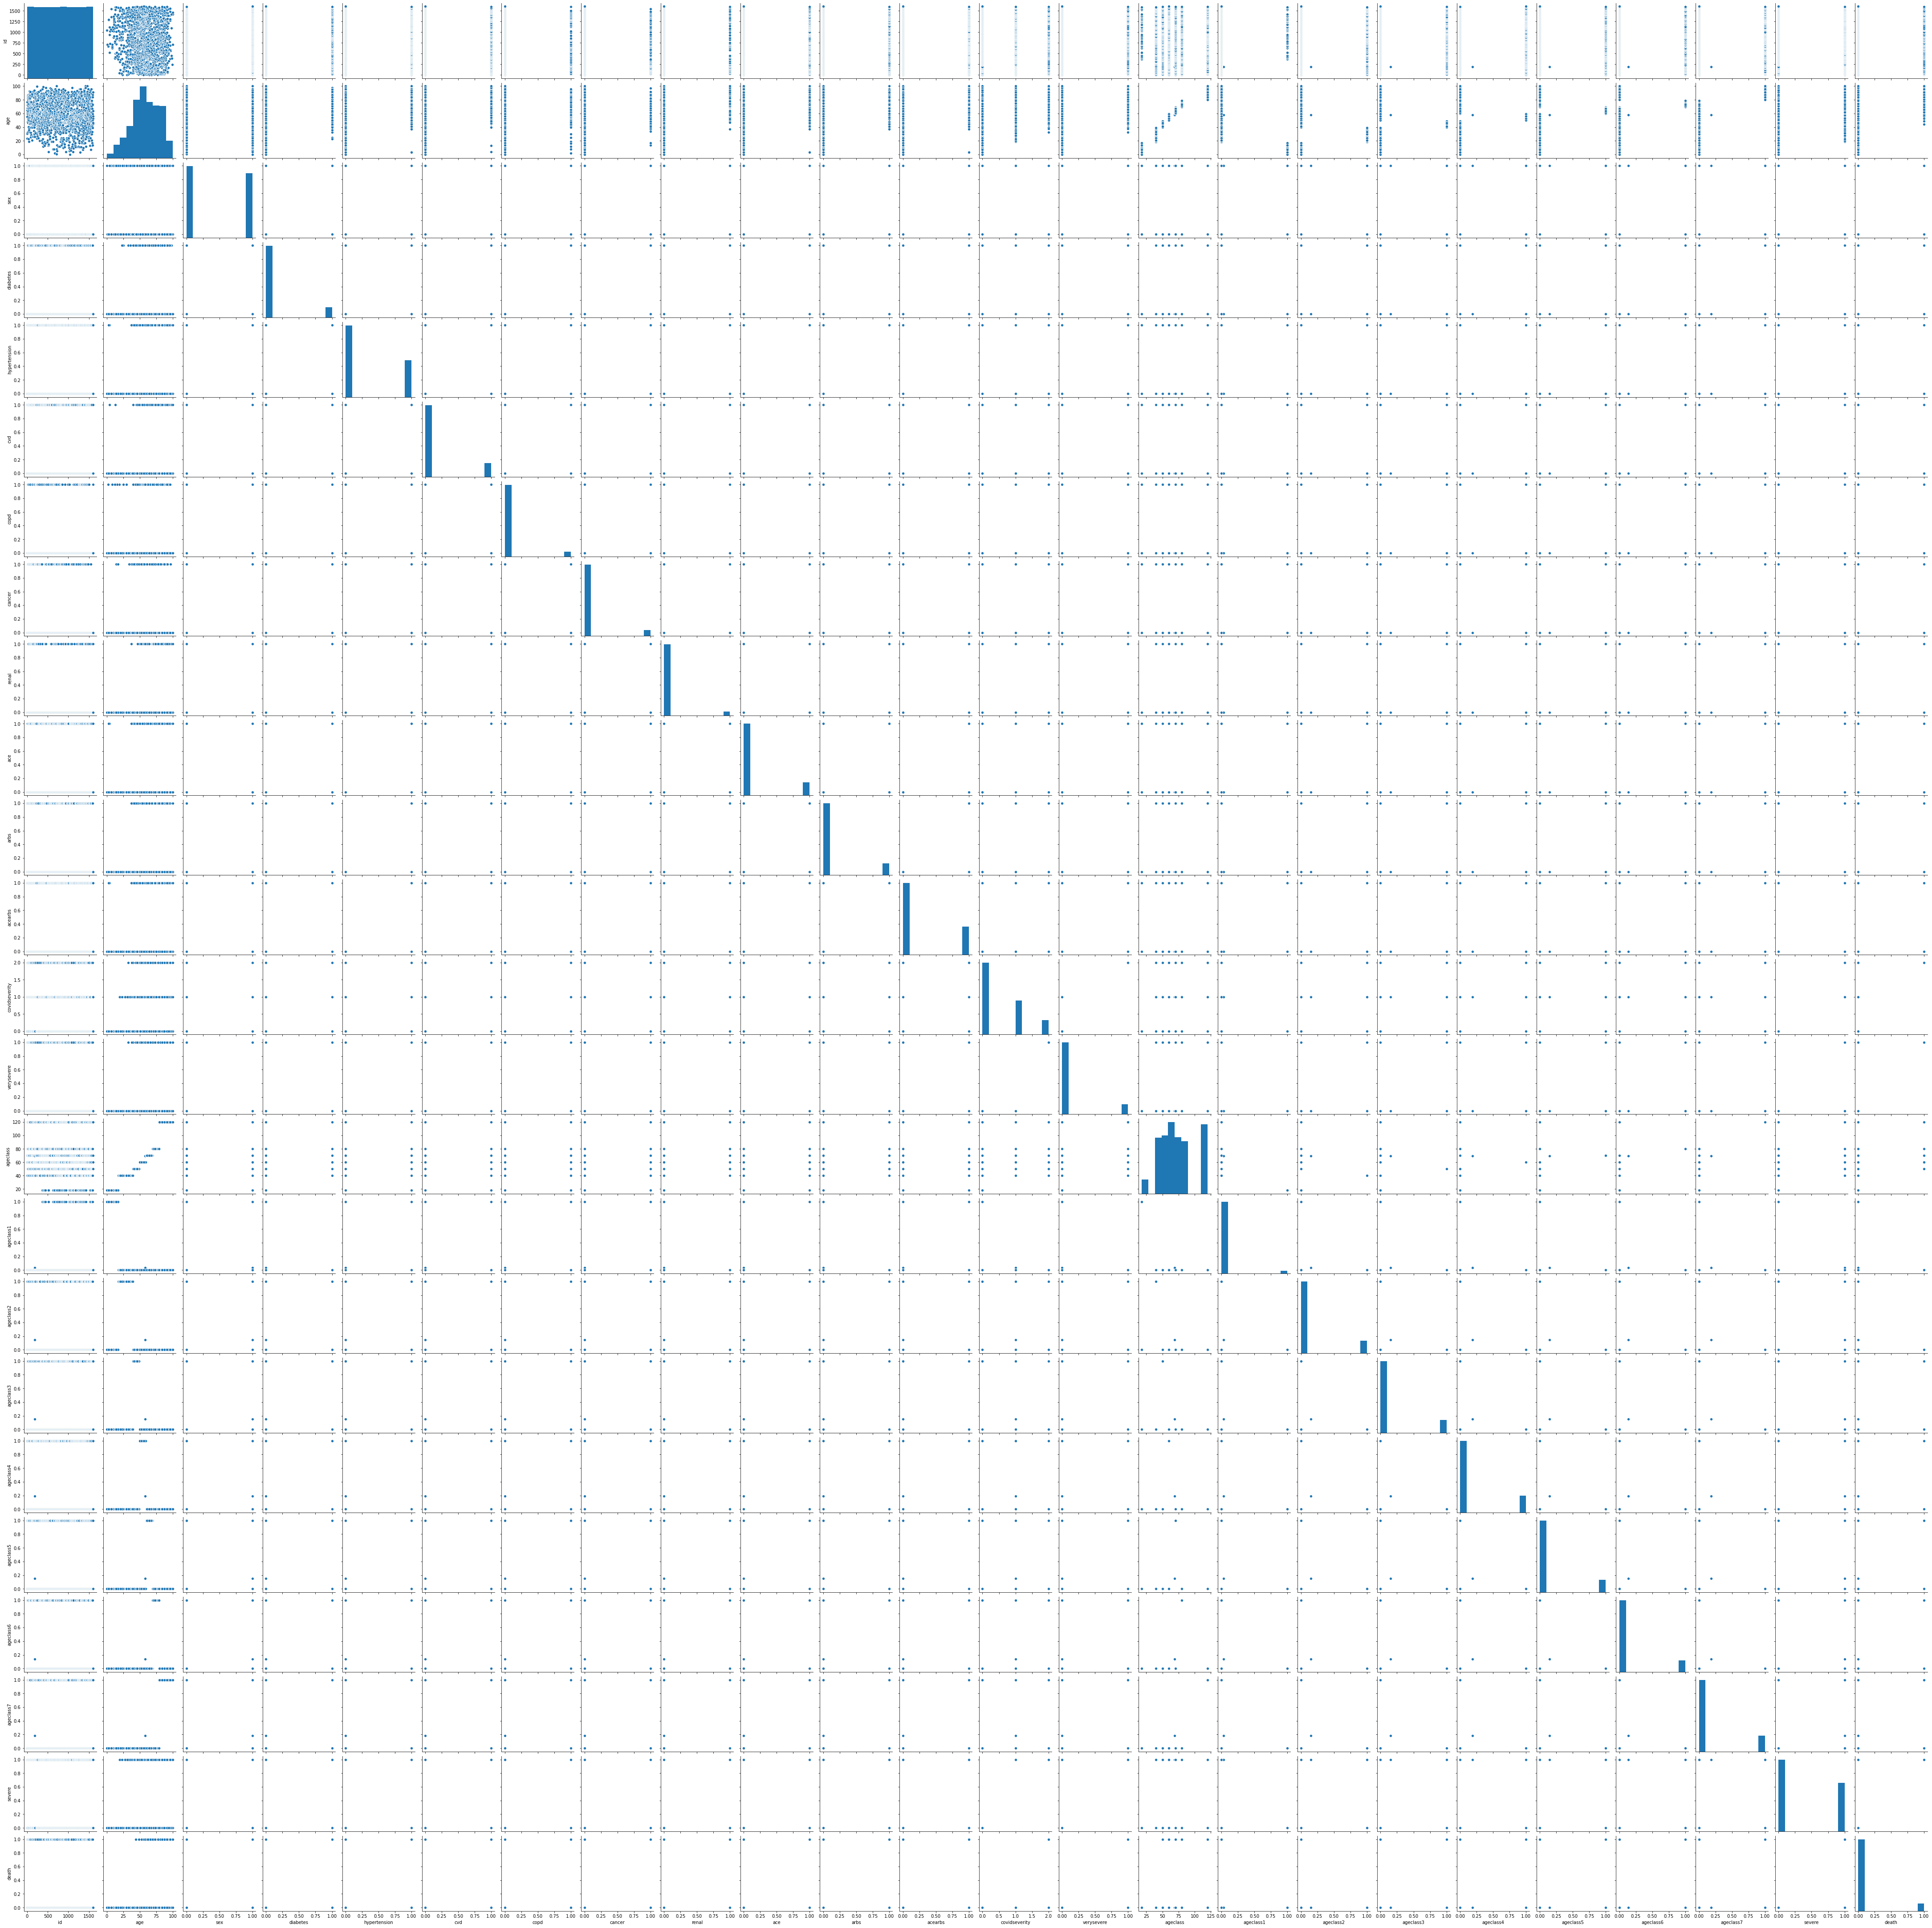

In [21]:
import seaborn
seaborn.pairplot(datasets)
plt.show()

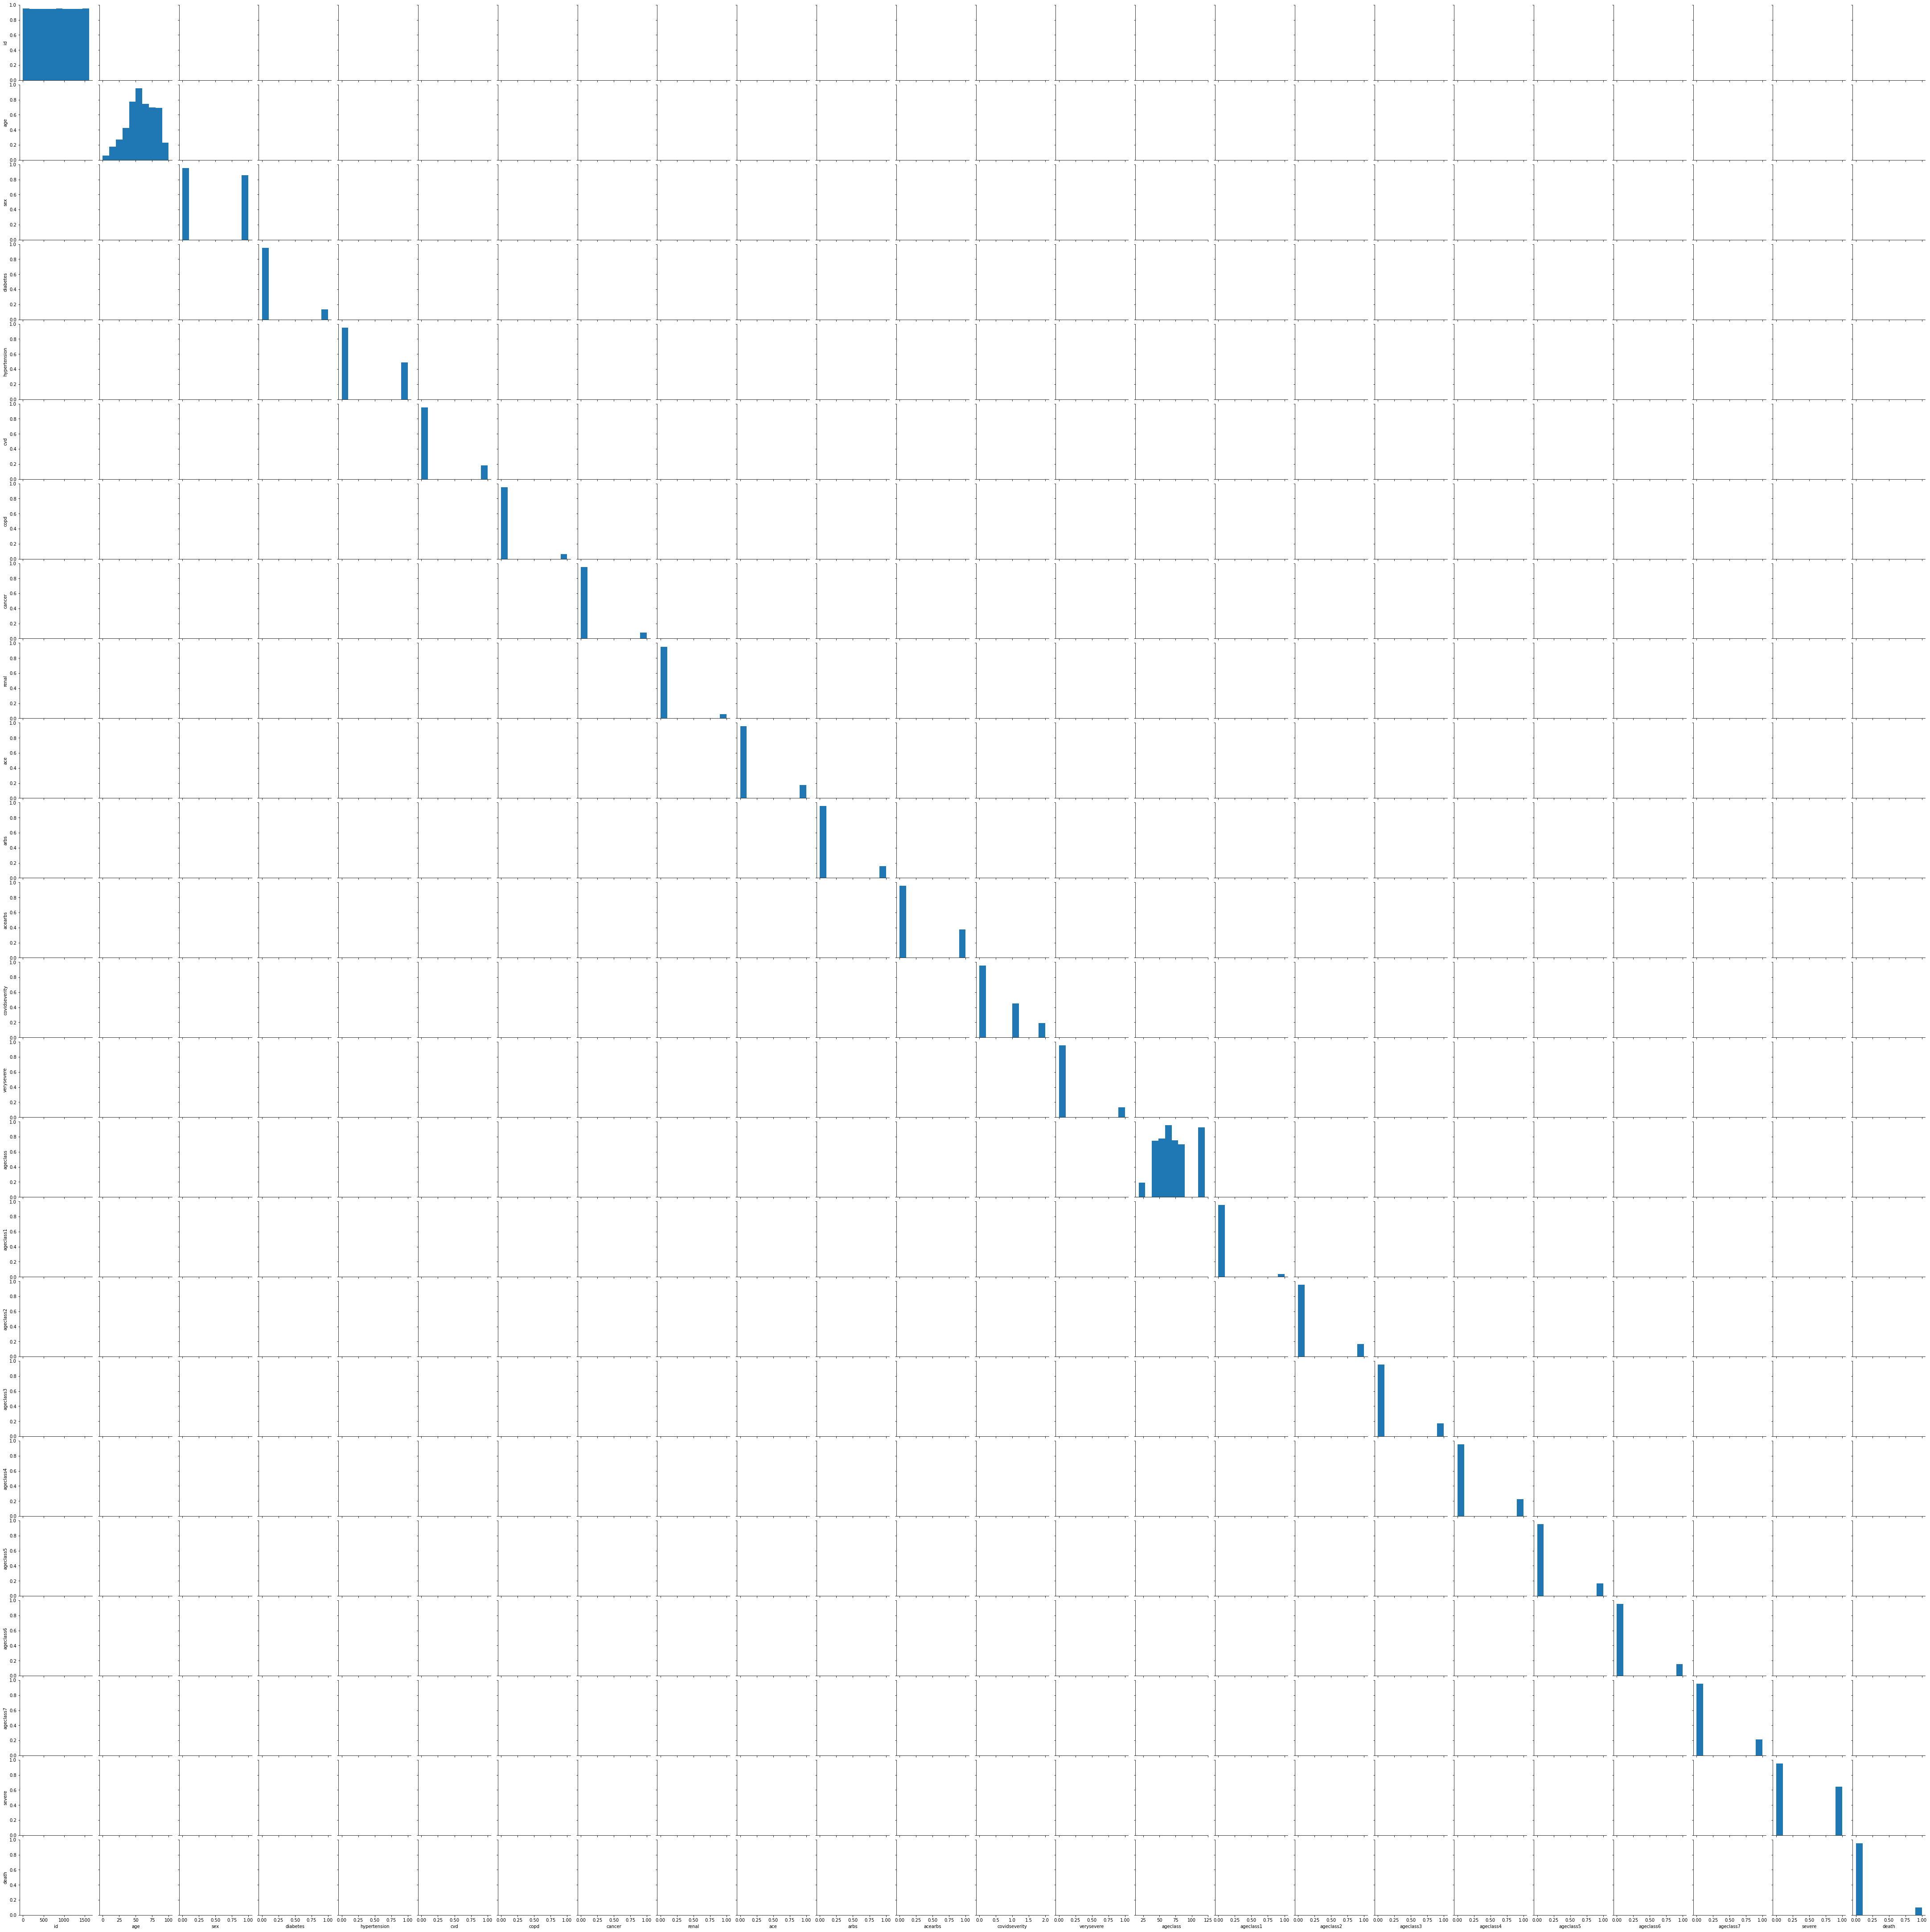

In [22]:
import seaborn
seaborn.pairplot(datasets,kind="hist")
plt.show()